# Correlation Analysis

In [1]:
import pandas as pd

# Define the list of file names
file_names = [
    "../../train/02-14-2018_clean.csv",
    "../../train/02-15-2018_clean.csv",
    "../../train/02-16-2018_clean.csv",
    "../../train/02-20-2018_clean.csv",
    "../../train/02-21-2018_clean.csv",
    "../../train/02-22-2018_clean.csv",
    "../../train/02-23-2018_clean.csv",
    "../../train/02-28-2018_clean.csv",
    "../../train/03-01-2018_clean.csv",
    "../../train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)


(12639793, 71)


In [2]:
corr_matrix = df.corr()

In [3]:
correlation_threshold = 0.1

# Select columns with correlation above the threshold with the target variable
relevant_columns = corr_matrix[abs(corr_matrix['Label']) > correlation_threshold].index.tolist()

# Exclude the 'Label' column from the relevant columns
relevant_columns.remove('Label')

# Print the relevant columns
print(relevant_columns)

['Dst Port', 'Protocol', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Pkt Len Min', 'Pkt Len Mean', 'ACK Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Time']


In [4]:
print(len(relevant_columns))

18


In [5]:
# Drop all other columns except for the relevant columns
df_filtered = df.drop(columns=[col for col in df.columns if col not in relevant_columns])

# Print the updated DataFrame
print(df_filtered)


          Dst Port  Protocol  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0              443         6             1109                0   
1            50198         6                0                0   
2               22         6                0                0   
3               53        17               42               42   
4             3389         6              661                0   
...            ...       ...              ...              ...   
12639788        53        17               36               36   
12639789        53        17               40               40   
12639790       445         6                0                0   
12639791      8080         6                0                0   
12639792       443         6              285                0   

          Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Min  \
0                      381              418                0   
1                        0                0                0   
2              

In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and the target variable (y)
X = df_filtered
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier on the training dataset
clf.fit(X_train, y_train)

# Evaluate the model on the testing dataset
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.990223338274078


In [7]:
df_filtered.shape

(12639793, 18)

In [13]:
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.990223338274078


In [14]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   2150974
           1       1.00      1.00      1.00     45059
           2       0.98      0.95      0.97     25425
           3       1.00      1.00      1.00    280771
           4       0.76      0.16      0.27     25719
           5       1.00      1.00      1.00        11

    accuracy                           0.99   2527959
   macro avg       0.95      0.85      0.87   2527959
weighted avg       0.99      0.99      0.99   2527959



In [20]:
test_data = pd.read_csv("../test/test.csv")
y_test = test_data["Label"]
X_test = test_data.drop(columns=[col for col in df.columns if col not in relevant_columns])
X_test = X_test.drop(columns='Unnamed: 0')

In [29]:
X_test.columns

Index(['Dst Port', 'Protocol', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Pkt Len Min', 'Pkt Len Mean', 'ACK Flag Cnt',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Time'],
      dtype='object')

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
y_pred_test = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9901087199026568
Precision: 0.9882634288549882
Recall: 0.9901087199026568
F1-score: 0.9871506482405777
Confusion Matrix:
[[2686526       2       4     119    1631       0]
 [     56   56556       0       0       1       0]
 [     30       0   29958    1562       0       0]
 [      0       0     577  350388       0       0]
 [  27267       0       1       1    5255       0]
 [      5       0       0       0       0      16]]


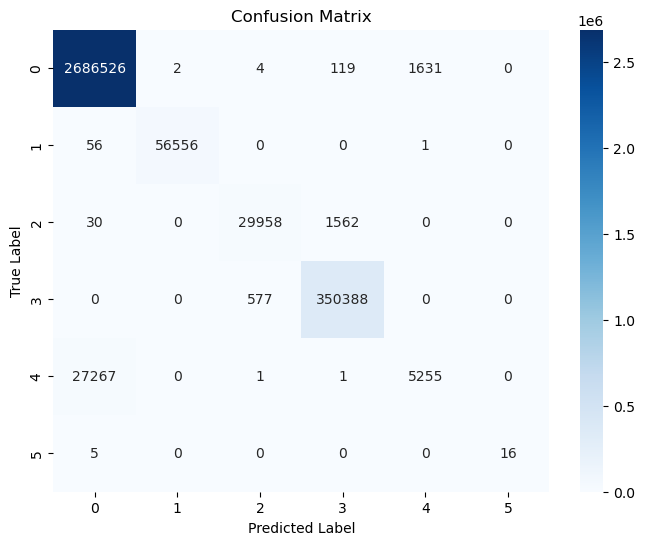

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
import pickle

# Save the trained model to a file
model_filename = 'xgboost_corrAnalysis.pkl'
pickle.dump(clf, open(model_filename, 'wb'))